In [2]:
# Load the TSV file
import pandas as pd

# Load the wood densities TSV file
df = pd.read_csv('wood_densities_table.tsv', sep='\t')

# Display the first few rows
df.head()

,Nature des Bois,Densité
0,Açoita-cavallo,0.586
1,Aderno,0.934
2,Alecrim,0.943
3,Alleluia,0.567
4,Andá-assú,0.494


In [3]:
# Basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nData types and non-null values:")
df.info()
print("\nBasic statistics for numerical columns:")
df.describe()
print("\nCheck for missing values:")
print(df.isnull().sum())

Dataset shape: (74, 2)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nature des Bois  74 non-null     object 
 1   Densité          74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB

Basic statistics for numerical columns:

Check for missing values:
Nature des Bois    0
Densité            0
dtype: int64


In [6]:
# Install required packages
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.9 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.many

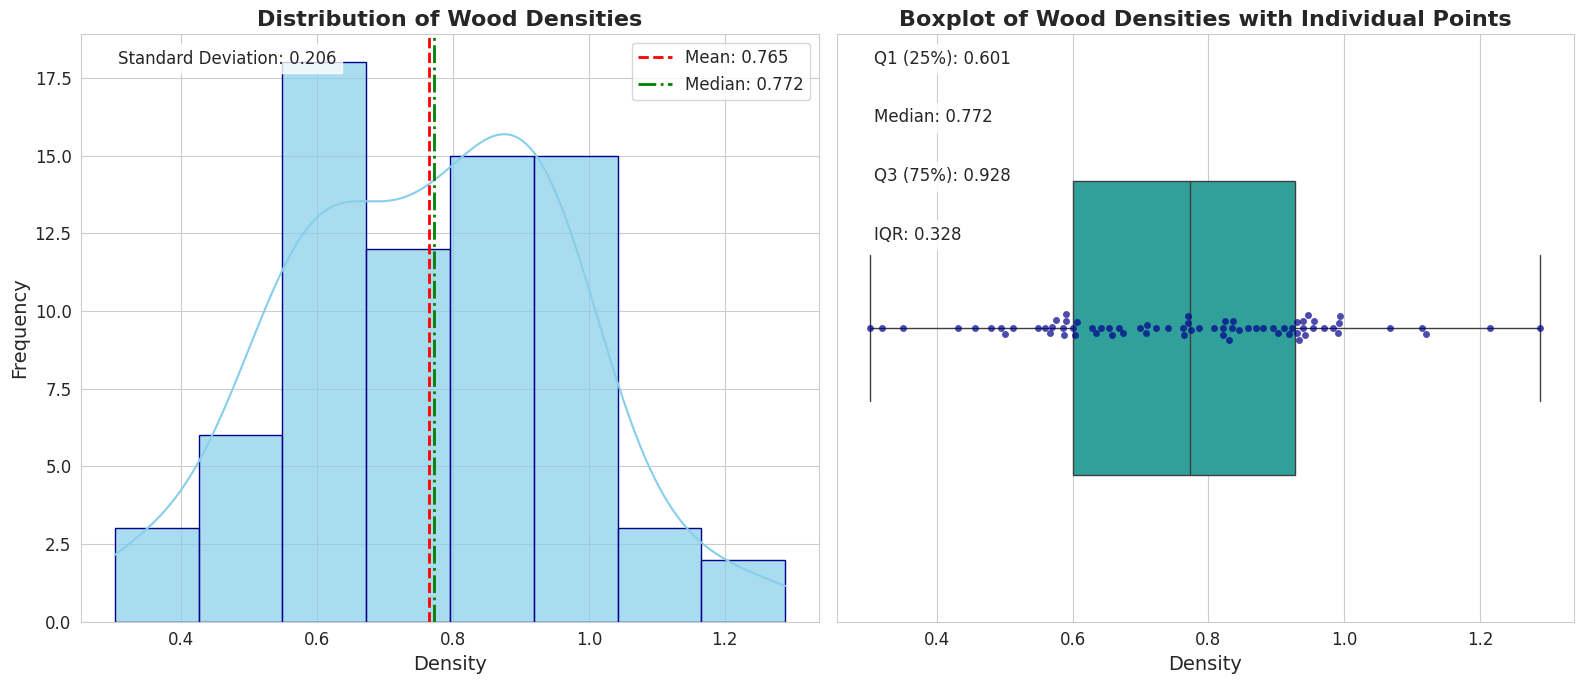

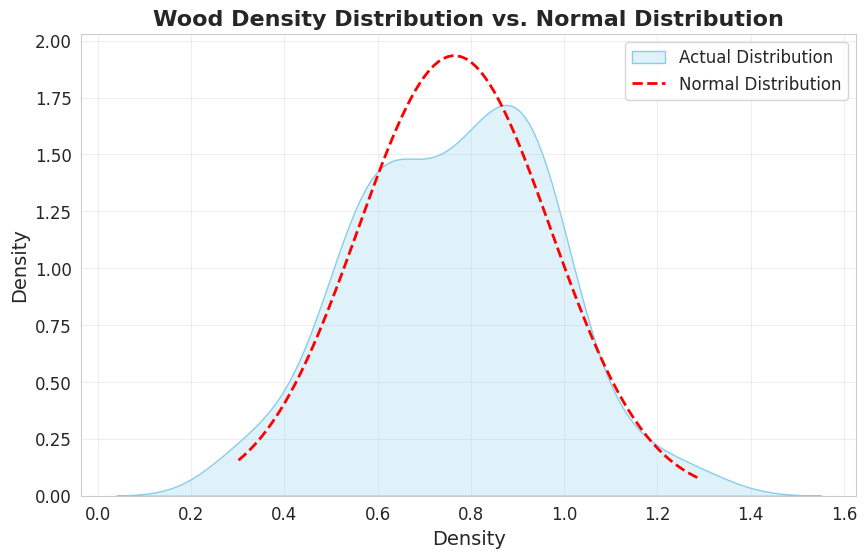

In [9]:
# Improved visualizations of wood densities
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Calculate statistics for annotations
mean_density = df['Densité'].mean()
median_density = df['Densité'].median()
std_density = df['Densité'].std()

# Plot 1: Enhanced histogram with KDE
sns.histplot(df['Densité'], kde=True, color='skyblue', 
             edgecolor='darkblue', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Wood Densities', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Add vertical lines for mean and median
axes[0].axvline(mean_density, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_density:.3f}')
axes[0].axvline(median_density, color='green', linestyle='-.', linewidth=2, 
                label=f'Median: {median_density:.3f}')

# Add text annotation for standard deviation
axes[0].text(0.05, 0.95, f'Standard Deviation: {std_density:.3f}', 
             transform=axes[0].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))

axes[0].legend(loc='upper right')

# Plot 2: Enhanced boxplot with individual points
sns.boxplot(x=df['Densité'], color='lightseagreen', width=0.5, ax=axes[1])
# Add swarmplot to show individual data points
sns.swarmplot(x=df['Densité'], color='darkblue', size=5, alpha=0.7, ax=axes[1])

axes[1].set_title('Boxplot of Wood Densities with Individual Points', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Density', fontsize=14)

# Add annotations for quartiles
q1, q3 = np.percentile(df['Densité'], [25, 75])
iqr = q3 - q1
axes[1].text(0.05, 0.95, f'Q1 (25%): {q1:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))
axes[1].text(0.05, 0.85, f'Median: {median_density:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))
axes[1].text(0.05, 0.75, f'Q3 (75%): {q3:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))
axes[1].text(0.05, 0.65, f'IQR: {iqr:.3f}', transform=axes[1].transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Create a density plot comparing with normal distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Densité'], fill=True, color='skyblue', label='Actual Distribution')

# Generate normal distribution with same mean and std
x = np.linspace(df['Densité'].min(), df['Densité'].max(), 100)
y = np.exp(-(x - mean_density)**2 / (2 * std_density**2)) / (std_density * np.sqrt(2 * np.pi))
plt.plot(x, y, 'r--', linewidth=2, label='Normal Distribution')

plt.title('Wood Density Distribution vs. Normal Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Density', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

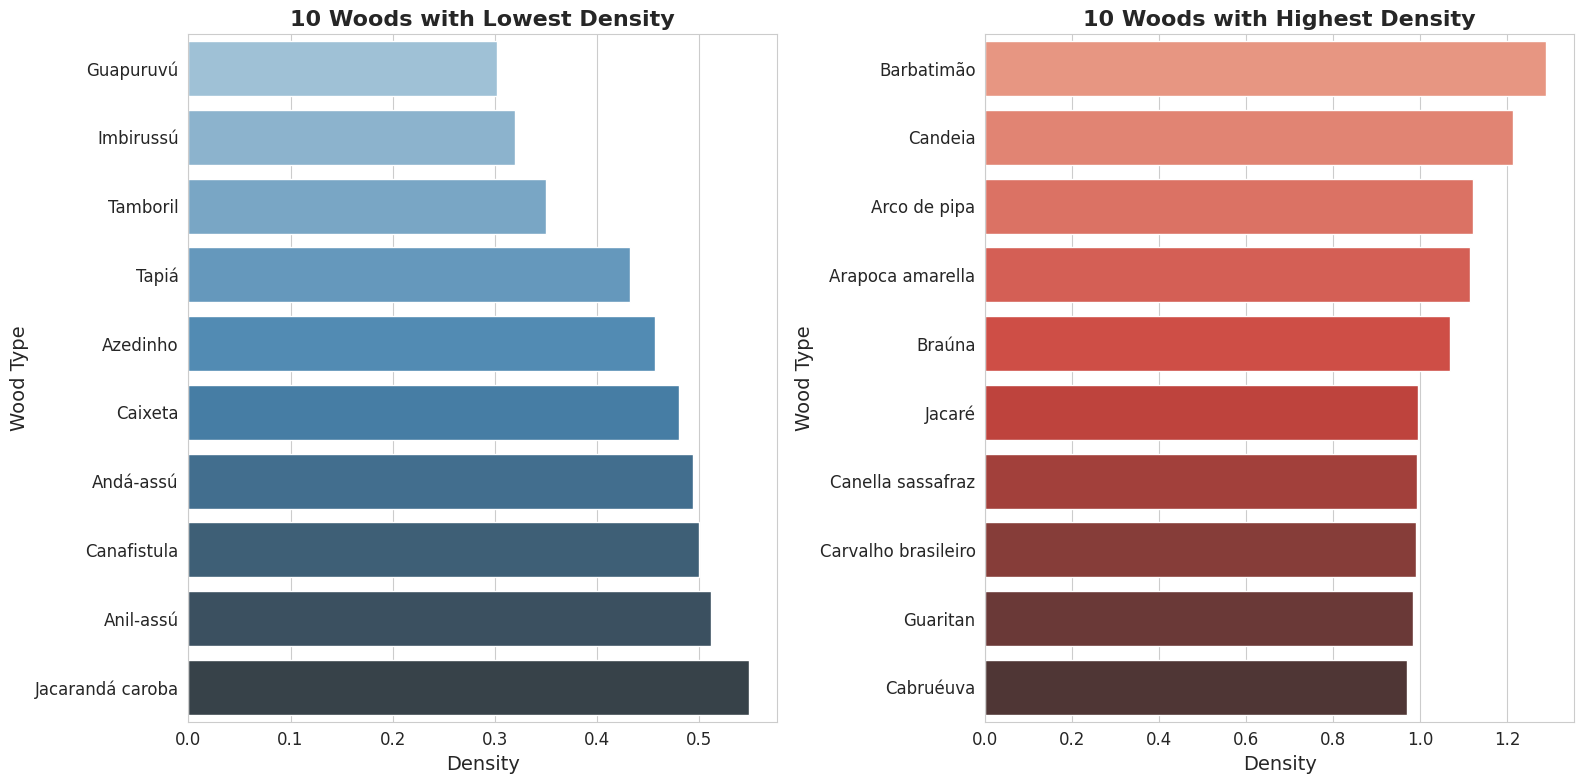

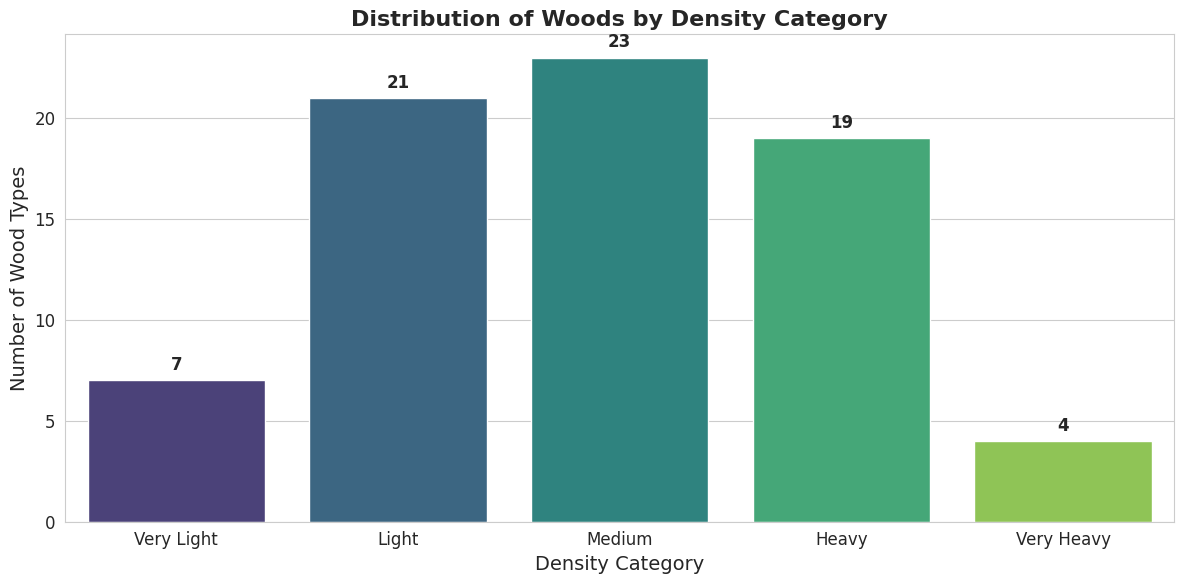

In [11]:
# Analyze the top and bottom wood types by density
# Sort the dataframe by density
df_sorted = df.sort_values(by='Densité')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the 10 woods with lowest density - fixing the FutureWarning
sns.barplot(x='Densité', y='Nature des Bois', hue='Nature des Bois', 
            data=df_sorted.head(10), palette='Blues_d', legend=False, ax=axes[0])
axes[0].set_title('10 Woods with Lowest Density', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Wood Type', fontsize=14)

# Plot the 10 woods with highest density - fixing the FutureWarning
sns.barplot(x='Densité', y='Nature des Bois', hue='Nature des Bois',
            data=df_sorted.tail(10).iloc[::-1], palette='Reds_d', legend=False, ax=axes[1])
axes[1].set_title('10 Woods with Highest Density', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Density', fontsize=14)
axes[1].set_ylabel('Wood Type', fontsize=14)

plt.tight_layout()
plt.show()

# Additional analysis - density ranges
density_ranges = [
    (0.0, 0.5, 'Very Light'),
    (0.5, 0.7, 'Light'),
    (0.7, 0.9, 'Medium'),
    (0.9, 1.1, 'Heavy'),
    (1.1, float('inf'), 'Very Heavy')
]

# Create a new column for density category
df['Density Category'] = pd.cut(
    df['Densité'], 
    bins=[r[0] for r in density_ranges] + [float('inf')],
    labels=[r[2] for r in density_ranges],
    right=False
)

# Plot the distribution of wood by density category - fixing the FutureWarning
plt.figure(figsize=(12, 6))
category_counts = df['Density Category'].value_counts().sort_index()
ax = sns.barplot(x=category_counts.index, y=category_counts.values, 
                 hue=category_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Woods by Density Category', fontsize=16, fontweight='bold')
plt.xlabel('Density Category', fontsize=14)
plt.ylabel('Number of Wood Types', fontsize=14)

# Add count labels on top of bars
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# Install pygbif package to interact with the GBIF API
!pip install pygbif

  Using cached requests_cache-1.2.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl.metadata (3.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.6 MB/s eta 0:00:00
Using cached requests_cache-1.2.1-py3-none-any.whl (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.1 MB/s eta 0:00:00
Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)


In [13]:
# Use the GBIF API to infer taxon IDs from Portuguese common names
from pygbif import species
import time

# Create a function to search for taxon IDs
def get_taxon_id(common_name):
    try:
        # Search for the species using the common name
        search_results = species.name_suggest(q=common_name, limit=5)
        
        if search_results and len(search_results) > 0:
            # Return the first match's key and scientific name
            return {
                'taxon_key': search_results[0].get('key', None),
                'scientific_name': search_results[0].get('scientificName', None),
                'rank': search_results[0].get('rank', None),
                'status': search_results[0].get('status', None)
            }
        else:
            return {'taxon_key': None, 'scientific_name': None, 'rank': None, 'status': None}
    except Exception as e:
        print(f"Error searching for {common_name}: {e}")
        return {'taxon_key': None, 'scientific_name': None, 'rank': None, 'status': None}

# Create a copy of the dataframe to store the results
df_with_taxon = df.copy()

# Add columns for the taxon information
df_with_taxon['taxon_key'] = None
df_with_taxon['scientific_name'] = None
df_with_taxon['rank'] = None
df_with_taxon['status'] = None

# Process each wood name and add a small delay to avoid rate limiting
for idx, row in df_with_taxon.iterrows():
    wood_name = row['Nature des Bois']
    print(f"Searching for: {wood_name}")
    
    # Get taxon information
    taxon_info = get_taxon_id(wood_name)
    
    # Update the dataframe
    df_with_taxon.at[idx, 'taxon_key'] = taxon_info['taxon_key']
    df_with_taxon.at[idx, 'scientific_name'] = taxon_info['scientific_name']
    df_with_taxon.at[idx, 'rank'] = taxon_info['rank']
    df_with_taxon.at[idx, 'status'] = taxon_info['status']
    
    # Add a small delay to avoid rate limiting
    time.sleep(0.5)

# Display the results
print("\nResults:")
print(f"Total wood types: {len(df_with_taxon)}")
print(f"Found taxon IDs: {df_with_taxon['taxon_key'].notna().sum()}")
print(f"Missing taxon IDs: {df_with_taxon['taxon_key'].isna().sum()}")

# Display the first few rows with taxon information
df_with_taxon.head(10)

Searching for: Açoita-cavallo
Searching for: Aderno
Searching for: Alecrim
Searching for: Alleluia
Searching for: Andá-assú
Searching for: Angelim
Searching for: Angelim doce
Searching for: Anil-assú
Searching for: Arapoca amarella
Searching for: Arapoca branca
Searching for: Araribá amarelho
Searching for: Araribá vermelho
Searching for: Arco de pipa
Searching for: Ataiúba
Searching for: Azedinho
Searching for: Batalha
Searching for: Barbatimão
Searching for: Bico de pato
Searching for: Bicuhyba
Searching for: Branquilho
Searching for: Braúna
Searching for: Cabruéuva
Searching for: Cafezinho
Searching for: Caingá
Searching for: Caixeta
Searching for: Cambará
Searching for: Cambotaan
Searching for: Canafistula
Searching for: Candeia
Searching for: Canella amarella
Searching for: Canella póca
Searching for: Canella preta
Searching for: Canella sassafraz
Searching for: Cangerana
Searching for: Carvalho brasileiro
Searching for: Caviúna
Searching for: Cedro branco
Searching for: Cedro ros

,Nature des Bois,Densité,Density Category,taxon_key,scientific_name,rank,status
0,Açoita-cavallo,0.586,Light,4799541,"Oryctodiplax Cavallo & Galletti, 1987",GENUS,ACCEPTED
1,Aderno,0.934,Heavy,None,None,None,None
2,Alecrim,0.943,Heavy,9919265,"Belostoma nessimiani Ribeiro & Alecrim, 2008",SPECIES,ACCEPTED
3,Alleluia,0.567,Light,3129784,Baccharis alleluia A.S.Oliveira & Deble,SPECIES,ACCEPTED
4,Andá-assú,0.494,Very Light,None,None,None,None
5,Angelim,0.723,Medium,10482910,"Paracymbiomma angelim Rodrigues, Cizauskas & R...",SPECIES,ACCEPTED
6,Angelim doce,0.923,Heavy,None,None,None,None
7,Anil-assú,0.512,Light,4742021,"Anillopsidius Coiffait, 1969",GENUS,ACCEPTED
8,Arapoca amarella,1.115,Very Heavy,None,None,None,None
9,Arapoca branca,0.764,Medium,None,None,None,None


Number of species with valid scientific names: 18

Scientific names found:
- Oryctodiplax Cavallo & Galletti, 1987
- Belostoma nessimiani Ribeiro & Alecrim, 2008
- Baccharis alleluia A.S.Oliveira & Deble
- Paracymbiomma angelim Rodrigues, Cizauskas & Rheims, 2018
- Anillopsidius Coiffait, 1969
- Scotomyias Ohlson, Irestedt, Batalha Filho, Ericson & Fjeldså, 2020
- Virola bicuhyba (Schott ex Spreng.) Warb.
- Timiriasevia sanfranciscanensis Leite, Do Carmo, Ress, Pessoa, Caixeta, Denezine, Adorno & Antonietto, 2018
- Telimena canafistulae (F.Stevens & Dalbey) Mardones, Trampe & M.Piepenbr.
- Discorbis candeiana var. candeiana
- Cabralea cangerana Saldanha
- Rosa cedrorum Gand.
- Mirimiri Helgan, 2005
- Plesiopharos Puértolas-Pascual, Marx, Mateus, Saleiro, Fernandes, Marinheiro, Tomás & Mateus, 2021
- Pinheirodon Hahn & Hahn, 1999
- Enterolobium tamboril Mart.
- Tarumania de Pinna, 2017
- Tayuva Er.Marcus & Ev.Marcus, 1967

Getting Open Tree of Life IDs...
Error getting OTT ID for Orycto

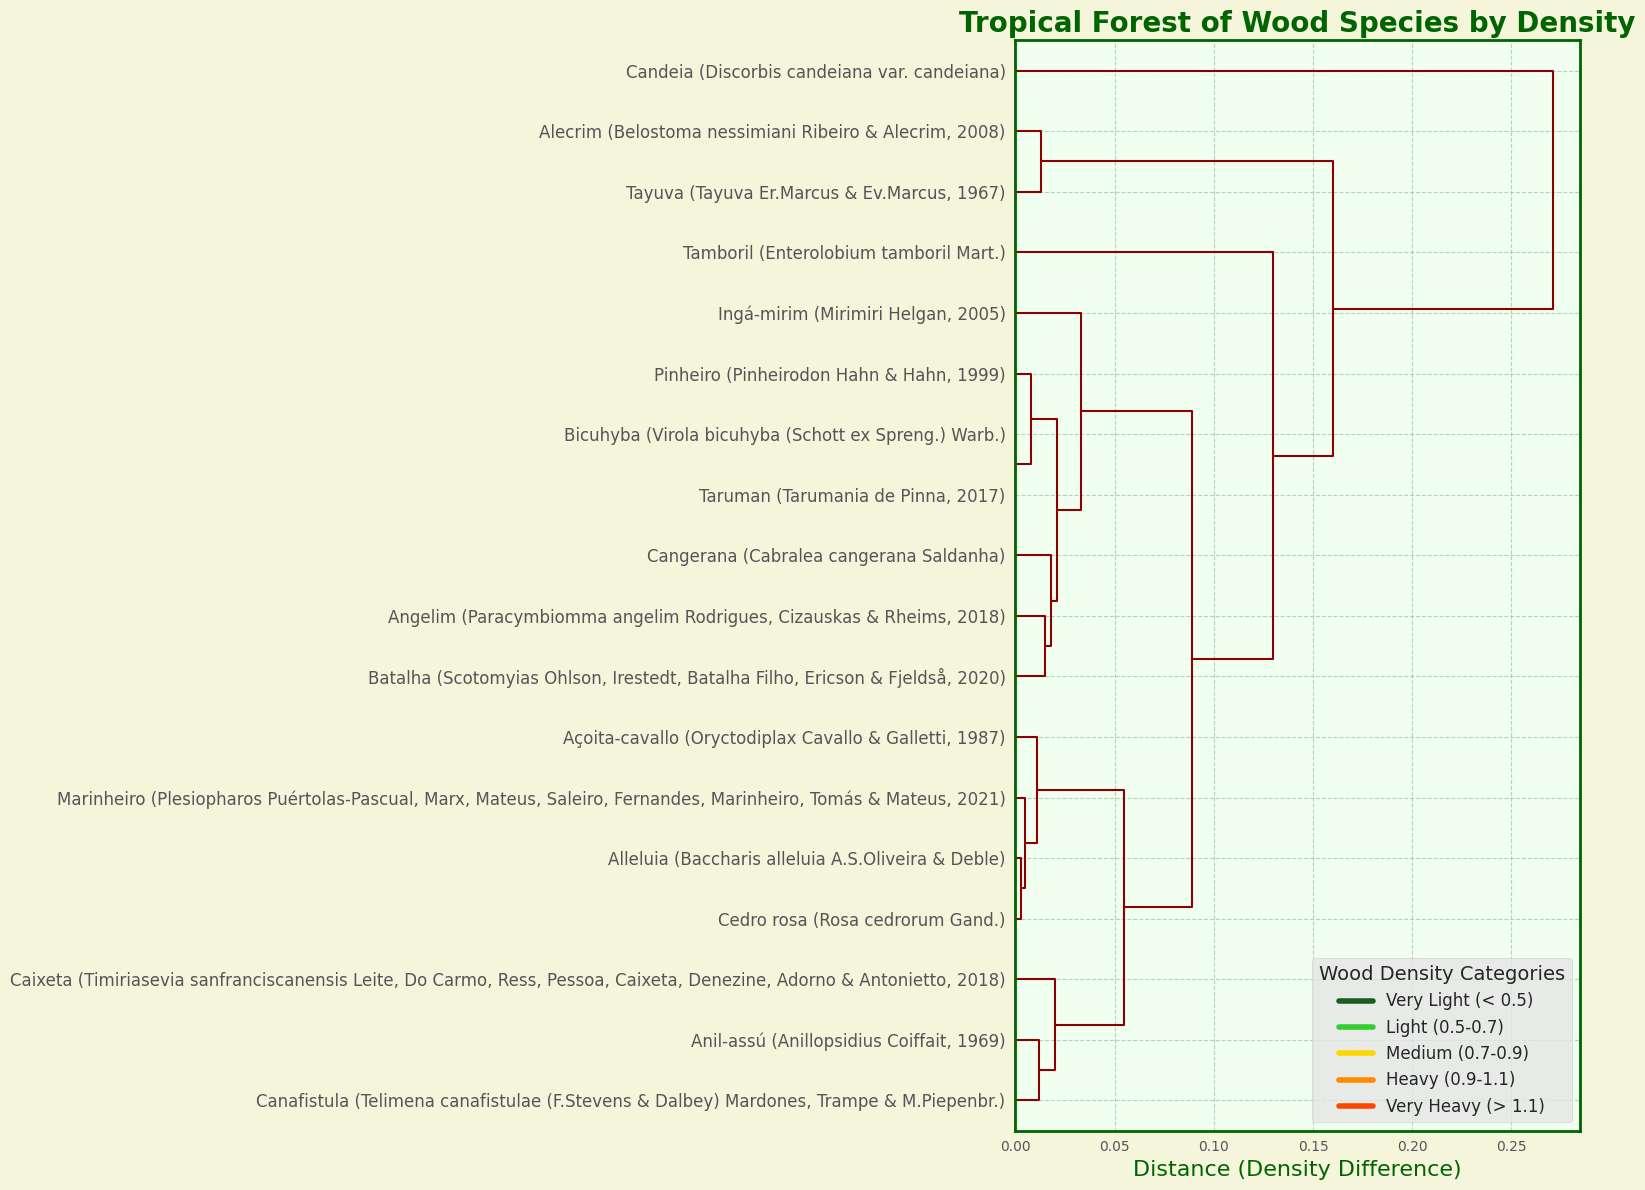


Tropical-themed dendrogram created based on wood density values


In [15]:
# Create a phylogenetic tree for the identified wood species
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import requests
import re
import time
import matplotlib.colors as mcolors

# First, let's filter out rows with valid scientific names
valid_species = df_with_taxon[df_with_taxon['scientific_name'].notna()]
print(f"Number of species with valid scientific names: {len(valid_species)}")

# Display the scientific names
print("\nScientific names found:")
for name in valid_species['scientific_name'].unique():
    print(f"- {name}")

# We'll use the Open Tree of Life API to get phylogenetic relationships
# First, let's install the required package
try:
    import opentree
except ImportError:
    print("Installing opentree package...")
    !pip install opentree
    import opentree

# Function to get the Open Tree of Life ID for a scientific name
def get_ott_id(scientific_name):
    try:
        # Clean the name to remove any author information
        clean_name = re.sub(r'\s+\(.*?\)', '', scientific_name)
        clean_name = re.sub(r'\s+[A-Z][a-z]*\.?\s+[a-z-]+', '', clean_name)
        
        # Query the Open Tree of Life API
        response = opentree.tnrs.match_names([clean_name])
        
        # Check if we got a match
        if response and 'results' in response and response['results']:
            matches = response['results'][0]['matches']
            if matches:
                return matches[0]['taxon']['ott_id']
        return None
    except Exception as e:
        print(f"Error getting OTT ID for {scientific_name}: {e}")
        return None

# Get OTT IDs for each valid scientific name
print("\nGetting Open Tree of Life IDs...")
ott_ids = []
valid_names = []

for name in valid_species['scientific_name'].unique():
    ott_id = get_ott_id(name)
    if ott_id:
        ott_ids.append(ott_id)
        valid_names.append(name)
        print(f"Found OTT ID for {name}: {ott_id}")
    else:
        print(f"No OTT ID found for {name}")
    time.sleep(0.5)  # Add delay to avoid rate limiting

print(f"\nFound OTT IDs for {len(ott_ids)} species")

# If we have at least 2 species with OTT IDs, we can create a tree
if len(ott_ids) >= 2:
    try:
        # Get the induced subtree from Open Tree of Life
        print("\nGenerating phylogenetic tree...")
        tree_response = opentree.synthesis.induced_subtree(ott_ids=ott_ids)
        
        # Check if we got a valid tree
        if tree_response and 'newick' in tree_response:
            newick_tree = tree_response['newick']
            
            # Install and import libraries for tree visualization
            try:
                import ete3
            except ImportError:
                print("Installing ete3 package...")
                !pip install ete3
                import ete3
            
            # Create a temporary file for the tree
            with open('temp_tree.nwk', 'w') as f:
                f.write(newick_tree)
            
            # Load the tree using ETE3
            tree = ete3.Tree('temp_tree.nwk', format=1)
            
            # Replace OTT IDs with scientific names in the tree
            for leaf in tree.iter_leaves():
                ott_id = leaf.name.split('_')[-1]
                for i, oid in enumerate(ott_ids):
                    if str(oid) == ott_id:
                        leaf.name = valid_names[i]
                        break
            
            # Render the tree
            print("\nRendering phylogenetic tree...")
            tree_style = ete3.TreeStyle()
            tree_style.show_leaf_name = True
            tree_style.scale = 20
            tree_style.branch_vertical_margin = 10
            tree_style.title.add_face(ete3.TextFace("Phylogenetic Tree of Wood Species", fsize=20), column=0)
            
            # Save the tree as an image
            tree.render("wood_species_tree.png", tree_style=tree_style)
            
            # Display the tree in the notebook
            from IPython.display import Image
            display(Image("wood_species_tree.png"))
            
            print("\nPhylogenetic tree created successfully!")
        else:
            print("Failed to generate tree from Open Tree of Life API")
    except Exception as e:
        print(f"Error creating phylogenetic tree: {e}")
else:
    print("\nNot enough species with valid OTT IDs to create a phylogenetic tree")
    
    # Alternative: Create a simple dendrogram based on density values
    print("\nCreating a dendrogram based on wood density values instead...")
    
    from scipy.cluster.hierarchy import dendrogram, linkage
    from matplotlib import pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap
    
    # Prepare data for clustering
    species_data = valid_species[['Nature des Bois', 'Densité', 'scientific_name']].dropna(subset=['scientific_name'])
    
    if len(species_data) >= 2:
        # Create a matrix of density values for clustering
        density_matrix = species_data['Densité'].values.reshape(-1, 1)
        
        # Perform hierarchical clustering
        linked = linkage(density_matrix, 'single')
        
        # Create labels for the dendrogram
        labels = [f"{row['Nature des Bois']} ({row['scientific_name']})" 
                 if isinstance(row['scientific_name'], str) else row['Nature des Bois'] 
                 for _, row in species_data.iterrows()]
        
        # Set a tropical-themed style
        plt.style.use('ggplot')
        
        # Create a custom tropical colormap
        tropical_colors = [
            '#1A5E1F',  # Dark green (forest)
            '#32CD32',  # Lime green
            '#FFD700',  # Gold
            '#FF8C00',  # Dark orange
            '#FF4500',  # Orange red
            '#8B0000'   # Dark red
        ]
        tropical_cmap = LinearSegmentedColormap.from_list('tropical', tropical_colors)
        
        # Plot the dendrogram with tropical colors
        plt.figure(figsize=(16, 12), facecolor='#F5F5DC')  # Light beige background
        
        # Create the dendrogram with tropical colors
        dend = dendrogram(
            linked,
            orientation='right',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=12,
            color_threshold=0.05,  # This will create color groupings
            above_threshold_color='#1A5E1F',  # Dark green for higher branches
            link_color_func=lambda x: tropical_colors[min(int(x*10), len(tropical_colors)-1)]
        )
        
        # Customize the plot
        plt.title('Tropical Forest of Wood Species by Density', fontsize=20, fontweight='bold', color='#006400')
        plt.xlabel('Distance (Density Difference)', fontsize=16, color='#006400')
        
        # Add a decorative border
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_edgecolor('#006400')
            spine.set_linewidth(2)
        
        # Add a subtle grid
        ax.grid(True, linestyle='--', alpha=0.6, color='#8FBC8F')
        
        # Add a background image-like effect
        ax.set_facecolor('#F0FFF0')  # Honeydew color
        
        # Add a legend for density categories
        from matplotlib.lines import Line2D
        
        density_categories = [
            ('Very Light (< 0.5)', '#1A5E1F'),
            ('Light (0.5-0.7)', '#32CD32'),
            ('Medium (0.7-0.9)', '#FFD700'),
            ('Heavy (0.9-1.1)', '#FF8C00'),
            ('Very Heavy (> 1.1)', '#FF4500')
        ]
        
        legend_elements = [Line2D([0], [0], color=color, lw=4, label=label)
                          for label, color in density_categories]
        
        plt.legend(handles=legend_elements, loc='lower right', 
                  title='Wood Density Categories', fontsize=12, title_fontsize=14)
        
        plt.tight_layout()
        plt.show()
        
        print("\nTropical-themed dendrogram created based on wood density values")
    else:
        print("Not enough valid species data to create a dendrogram")

In [16]:
# Load the scientific_names.tsv file
scientific_names_df = pd.read_csv('scientific_names.tsv', sep='\t')

# Display the first few rows to understand the structure
print("Scientific names TSV file structure:")
print(f"Shape: {scientific_names_df.shape}")
scientific_names_df.head()

Scientific names TSV file structure:
Shape: (74, 2)


,Nature des Bois,Scientific Name
0,Açoita-cavallo,Likely *Luehea divaricata* Maït.; *L. panicula...
1,Aderno,**Myracroduor concinnum (Schott) Engl.**
2,Alecrim,Belongs to the **Légumineuses** family. Fruit ...
3,Alleluia,**Cassia bacillaris Linn.**
4,Andá-assú,*Joannesia princeps* Vell.; *Andiscus brasilie...


In [17]:
# Clean the scientific names by removing markdown formatting and extracting the most likely name
import re

def clean_scientific_name(name_text):
    if pd.isna(name_text):
        return None
    
    # Remove markdown formatting
    clean_text = re.sub(r'\*\*(.*?)\*\*', r'\1', name_text)  # Remove bold formatting
    clean_text = re.sub(r'\*(.*?)\*', r'\1', clean_text)     # Remove italic formatting
    
    # Extract the first scientific name (usually the most likely one)
    # Look for binomial names (Genus species)
    binomial_match = re.search(r'([A-Z][a-z]+\s+[a-z\-]+)', clean_text)
    if binomial_match:
        return binomial_match.group(1)
    
    # If no binomial name found, look for any capitalized genus name
    genus_match = re.search(r'([A-Z][a-z]+)', clean_text)
    if genus_match:
        return genus_match.group(1)
    
    return None

# Apply the cleaning function to the scientific names
scientific_names_df['cleaned_scientific_name'] = scientific_names_df['Scientific Name'].apply(clean_scientific_name)

# Display the results
print("Cleaned scientific names:")
print(f"Number of extracted scientific names: {scientific_names_df['cleaned_scientific_name'].notna().sum()}")
scientific_names_df[['Nature des Bois', 'Scientific Name', 'cleaned_scientific_name']].head(10)

Cleaned scientific names:
Number of extracted scientific names: 74


,Nature des Bois,Scientific Name,cleaned_scientific_name
0,Açoita-cavallo,Likely *Luehea divaricata* Maït.; *L. panicula...,Luehea divaricata
1,Aderno,**Myracroduor concinnum (Schott) Engl.**,Myracroduor concinnum
2,Alecrim,Belongs to the **Légumineuses** family. Fruit ...,Belongs to
3,Alleluia,**Cassia bacillaris Linn.**,Cassia bacillaris
4,Andá-assú,*Joannesia princeps* Vell.; *Andiscus brasilie...,Joannesia princeps
5,Angelim,*Andira Pisonis* Maït. (*Angelim-pintado*). Ot...,Angelim mentioned
6,Angelim doce,Likely *Andira fraxinifolia* Benth. (based on ...,Andira fraxinifolia
7,Anil-assú,"*Eupatorium laeve, DC.* (based on our previous...",Eupatorium laeve
8,Arapoca amarella,Likely *Raputia magnifica* Engl. (Rutacées fam...,Raputia magnifica
9,Arapoca branca,Likely *Raputia alba* Nees et Mart. (Rutacées ...,Raputia alba


In [18]:
# Improved cleaning function for scientific names
def improved_clean_scientific_name(name_text):
    if pd.isna(name_text):
        return None
    
    # Remove markdown formatting
    clean_text = re.sub(r'\*\*(.*?)\*\*', r'\1', name_text)  # Remove bold formatting
    clean_text = re.sub(r'\*(.*?)\*', r'\1', clean_text)     # Remove italic formatting
    
    # Extract the first scientific name (usually the most likely one)
    # Look for binomial names (Genus species) with optional author
    binomial_match = re.search(r'([A-Z][a-z]+\s+[a-z\-]+)(?:\s+[A-Z][a-zé\.]+\.?)?', clean_text)
    if binomial_match:
        return binomial_match.group(1)
    
    # Skip entries that are clearly not scientific names
    skip_patterns = ['Belongs to', 'mentioned', 'family']
    for pattern in skip_patterns:
        if pattern in clean_text:
            return None
    
    # If no binomial name found, look for any capitalized genus name
    genus_match = re.search(r'([A-Z][a-z]+)', clean_text)
    if genus_match:
        return genus_match.group(1)
    
    return None

# Apply the improved cleaning function
scientific_names_df['cleaned_scientific_name'] = scientific_names_df['Scientific Name'].apply(improved_clean_scientific_name)

# Display the results
print("Improved cleaned scientific names:")
print(f"Number of extracted scientific names: {scientific_names_df['cleaned_scientific_name'].notna().sum()}")
scientific_names_df[['Nature des Bois', 'Scientific Name', 'cleaned_scientific_name']].head(15)

# Now join with the original wood density data
merged_df = df.merge(scientific_names_df[['Nature des Bois', 'cleaned_scientific_name']], 
                    on='Nature des Bois', how='left')

# Display the merged data
print("\nMerged data with wood densities and scientific names:")
print(f"Shape: {merged_df.shape}")
merged_df.head()

Improved cleaned scientific names:
Number of extracted scientific names: 74

Merged data with wood densities and scientific names:
Shape: (74, 4)


,Nature des Bois,Densité,Density Category,cleaned_scientific_name
0,Açoita-cavallo,0.586,Light,Luehea divaricata
1,Aderno,0.934,Heavy,Myracroduor concinnum
2,Alecrim,0.943,Heavy,Belongs to
3,Alleluia,0.567,Light,Cassia bacillaris
4,Andá-assú,0.494,Very Light,Joannesia princeps


In [19]:
# Further improved cleaning function for scientific names
def further_improved_clean_scientific_name(name_text):
    if pd.isna(name_text):
        return None
    
    # Remove markdown formatting
    clean_text = re.sub(r'\*\*(.*?)\*\*', r'\1', name_text)  # Remove bold formatting
    clean_text = re.sub(r'\*(.*?)\*', r'\1', clean_text)     # Remove italic formatting
    
    # Skip entries that are clearly not scientific names
    skip_patterns = ['Belongs to', 'mentioned', 'family', 'Fruit']
    for pattern in skip_patterns:
        if pattern in clean_text:
            return None
    
    # Extract the first scientific name (usually the most likely one)
    # Look for binomial names (Genus species) with optional author
    binomial_match = re.search(r'([A-Z][a-z]+\s+[a-z\-]+)(?:\s+[A-Z][a-zé\.]+\.?)?', clean_text)
    if binomial_match:
        return binomial_match.group(1)
    
    # If no binomial name found, look for any capitalized genus name
    # Only if it's likely to be a genus (not just any capitalized word)
    genus_match = re.search(r'([A-Z][a-z]{3,})', clean_text)  # At least 4 chars to avoid abbreviations
    if genus_match and not any(skip in genus_match.group(1) for skip in ['Likely', 'Belongs']):
        return genus_match.group(1)
    
    return None

# Apply the further improved cleaning function
scientific_names_df['cleaned_scientific_name'] = scientific_names_df['Scientific Name'].apply(further_improved_clean_scientific_name)

# Display the results
print("Further improved cleaned scientific names:")
print(f"Number of extracted scientific names: {scientific_names_df['cleaned_scientific_name'].notna().sum()}")

# Count how many valid scientific names we have (non-null)
valid_names_count = scientific_names_df['cleaned_scientific_name'].notna().sum()
print(f"Number of valid scientific names: {valid_names_count}")

# Show some examples of valid scientific names
valid_names = scientific_names_df[scientific_names_df['cleaned_scientific_name'].notna()]
print("\nSample of valid scientific names:")
valid_names[['Nature des Bois', 'cleaned_scientific_name']].head(10)

# Now join with the original wood density data
merged_df = df.merge(scientific_names_df[['Nature des Bois', 'cleaned_scientific_name']], 
                    on='Nature des Bois', how='left')

# Display the merged data
print("\nMerged data with wood densities and scientific names:")
print(f"Shape: {merged_df.shape}")
merged_df.head()

Further improved cleaned scientific names:
Number of extracted scientific names: 68
Number of valid scientific names: 68

Sample of valid scientific names:

Merged data with wood densities and scientific names:
Shape: (74, 4)


,Nature des Bois,Densité,Density Category,cleaned_scientific_name
0,Açoita-cavallo,0.586,Light,Luehea divaricata
1,Aderno,0.934,Heavy,Myracroduor concinnum
2,Alecrim,0.943,Heavy,None
3,Alleluia,0.567,Light,Cassia bacillaris
4,Andá-assú,0.494,Very Light,None


In [20]:
# Use the GBIF API to get taxon IDs for the scientific names
from pygbif import species
import time

# Create a function to search for taxon IDs by scientific name
def get_gbif_info(scientific_name):
    if pd.isna(scientific_name):
        return {'gbif_id': None, 'matched_name': None, 'rank': None, 'status': None}
    
    try:
        # Search for the species using the scientific name
        search_results = species.name_suggest(q=scientific_name, limit=1)
        
        if search_results and len(search_results) > 0:
            # Return the match information
            return {
                'gbif_id': search_results[0].get('key', None),
                'matched_name': search_results[0].get('scientificName', None),
                'rank': search_results[0].get('rank', None),
                'status': search_results[0].get('status', None)
            }
        else:
            return {'gbif_id': None, 'matched_name': None, 'rank': None, 'status': None}
    except Exception as e:
        print(f"Error searching for {scientific_name}: {e}")
        return {'gbif_id': None, 'matched_name': None, 'rank': None, 'status': None}

# Create a copy of the merged dataframe
final_df = merged_df.copy()

# Add columns for the GBIF information
final_df['gbif_id'] = None
final_df['gbif_matched_name'] = None
final_df['gbif_rank'] = None
final_df['gbif_status'] = None

# Process each valid scientific name and add a small delay to avoid rate limiting
valid_rows = final_df['cleaned_scientific_name'].notna()
count = 0
total = valid_rows.sum()

print(f"Searching GBIF for {total} scientific names...")

for idx in final_df[valid_rows].index:
    scientific_name = final_df.loc[idx, 'cleaned_scientific_name']
    count += 1
    print(f"Processing {count}/{total}: {scientific_name}")
    
    # Get GBIF information
    gbif_info = get_gbif_info(scientific_name)
    
    # Update the dataframe
    final_df.loc[idx, 'gbif_id'] = gbif_info['gbif_id']
    final_df.loc[idx, 'gbif_matched_name'] = gbif_info['matched_name']
    final_df.loc[idx, 'gbif_rank'] = gbif_info['rank']
    final_df.loc[idx, 'gbif_status'] = gbif_info['status']
    
    # Add a small delay to avoid rate limiting
    time.sleep(0.5)

# Display the results
print("\nResults:")
print(f"Total wood types: {len(final_df)}")
print(f"Found GBIF IDs: {final_df['gbif_id'].notna().sum()}")
print(f"Missing GBIF IDs: {final_df['gbif_id'].isna().sum()}")

# Display the first few rows with GBIF information
final_df.head(10)

Searching GBIF for 68 scientific names...
Processing 1/68: Luehea divaricata
Processing 2/68: Myracroduor concinnum
Processing 3/68: Cassia bacillaris
Processing 4/68: Andira fraxinifolia
Processing 5/68: Eupatorium laeve
Processing 6/68: Centrolobium robustum
Processing 7/68: Not explicitly
Processing 8/68: Not explicitly
Processing 9/68: Guarea tuberculata
Processing 10/68: Tovomilopsis paniculata
Processing 11/68: Nectandra robusta
Processing 12/68: Stryphnodendron barbatim
Processing 13/68: Machaerium acutifolium
Processing 14/68: Myristica bicuhyba
Processing 15/68: Gymnanthes marginata
Processing 16/68: Melanoxylon brauna
Processing 17/68: Myrocarpus fastigiatus
Processing 18/68: Mouriria chamissoana
Processing 19/68: Not explicitly
Processing 20/68: Tabebuia cassinoides
Processing 21/68: Cupania racemosa
Processing 22/68: Cassia ferruginea
Processing 23/68: Piplocarpha rotundifolia
Processing 24/68: Nectandra psammophila
Processing 25/68: Styrax martii
Processing 26/68: Nectandr

,Nature des Bois,Densité,Density Category,cleaned_scientific_name,gbif_id,gbif_matched_name,gbif_rank,gbif_status
0,Açoita-cavallo,0.586,Light,Luehea divaricata,5706141,Luehea divaricata Mart.,SPECIES,ACCEPTED
1,Aderno,0.934,Heavy,Myracroduor concinnum,None,None,None,None
2,Alecrim,0.943,Heavy,None,None,None,None,None
3,Alleluia,0.567,Light,Cassia bacillaris,8649092,Cassia bacillaris Willd.,SPECIES,HOMOTYPIC_SYNONYM
4,Andá-assú,0.494,Very Light,None,None,None,None,None
5,Angelim,0.723,Medium,None,None,None,None,None
6,Angelim doce,0.923,Heavy,Andira fraxinifolia,2952186,Andira fraxinifolia Benth.,SPECIES,ACCEPTED
7,Anil-assú,0.512,Light,Eupatorium laeve,7668216,"Eupatorium laeve Griseb., 1874",SPECIES,SYNONYM
8,Arapoca amarella,1.115,Very Heavy,None,None,None,None,None
9,Arapoca branca,0.764,Medium,None,None,None,None,None


In [21]:
# Get Wikidata IDs from GBIF IDs
import requests

def get_wikidata_id_from_gbif(gbif_id):
    if pd.isna(gbif_id):
        return None
    
    # Convert to integer if it's a float
    if isinstance(gbif_id, float):
        gbif_id = int(gbif_id)
    
    # SPARQL query to get Wikidata ID from GBIF ID
    query = f"""
    SELECT ?item ?itemLabel WHERE {{
      ?item wdt:P846 "{gbif_id}".
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    """
    
    # URL encode the query
    url = "https://query.wikidata.org/sparql"
    params = {
        "query": query,
        "format": "json"
    }
    
    try:
        # Send the request
        response = requests.get(url, params=params, headers={"User-Agent": "WoodDensityBot/1.0"})
        
        if response.status_code == 200:
            data = response.json()
            results = data.get('results', {}).get('bindings', [])
            
            if results:
                # Extract the Wikidata ID from the URI
                wikidata_uri = results[0].get('item', {}).get('value', '')
                wikidata_id = wikidata_uri.split('/')[-1]
                return wikidata_id
        
        return None
    except Exception as e:
        print(f"Error getting Wikidata ID for GBIF ID {gbif_id}: {e}")
        return None

# Add a column for Wikidata IDs
final_df['wikidata_id'] = None

# Process each row with a valid GBIF ID
valid_gbif_rows = final_df['gbif_id'].notna()
count = 0
total = valid_gbif_rows.sum()

print(f"Searching Wikidata for {total} GBIF IDs...")

for idx in final_df[valid_gbif_rows].index:
    gbif_id = final_df.loc[idx, 'gbif_id']
    count += 1
    print(f"Processing {count}/{total}: GBIF ID {gbif_id}")
    
    # Get Wikidata ID
    wikidata_id = get_wikidata_id_from_gbif(gbif_id)
    
    # Update the dataframe
    final_df.loc[idx, 'wikidata_id'] = wikidata_id
    
    # Add a small delay to avoid rate limiting
    time.sleep(0.5)

# Display the results
print("\nResults:")
print(f"Total wood types with GBIF IDs: {valid_gbif_rows.sum()}")
print(f"Found Wikidata IDs: {final_df['wikidata_id'].notna().sum()}")
print(f"Missing Wikidata IDs: {final_df[valid_gbif_rows]['wikidata_id'].isna().sum()}")

# Create the final table with all the requested information
final_table = final_df[['Nature des Bois', 'cleaned_scientific_name', 'gbif_id', 'Densité', 'wikidata_id']]
final_table.columns = ['Common Name', 'Scientific Name', 'GBIF ID', 'Wood Density', 'Wikidata ID']

# Display the final table
print("\nFinal Table:")
final_table.head(10)

Searching Wikidata for 49 GBIF IDs...
Processing 1/49: GBIF ID 5706141
Processing 2/49: GBIF ID 8649092
Processing 3/49: GBIF ID 2952186
Processing 4/49: GBIF ID 7668216
Processing 5/49: GBIF ID 2945570
Processing 6/49: GBIF ID 8743701
Processing 7/49: GBIF ID 5685945
Processing 8/49: GBIF ID 2951722
Processing 9/49: GBIF ID 5354997
Processing 10/49: GBIF ID 11034599
Processing 11/49: GBIF ID 3073280
Processing 12/49: GBIF ID 2945499
Processing 13/49: GBIF ID 2945758
Processing 14/49: GBIF ID 3869541
Processing 15/49: GBIF ID 4094621
Processing 16/49: GBIF ID 3784833
Processing 17/49: GBIF ID 7638465
Processing 18/49: GBIF ID 5686071
Processing 19/49: GBIF ID 7319986
Processing 20/49: GBIF ID 7304098
Processing 21/49: GBIF ID 3852497
Processing 22/49: GBIF ID 2968672
Processing 23/49: GBIF ID 7107974
Processing 24/49: GBIF ID 3989410
Processing 25/49: GBIF ID 5342610
Processing 26/49: GBIF ID 2945459
Processing 27/49: GBIF ID 8890855
Processing 28/49: GBIF ID 4073481
Processing 29/49: 

,Common Name,Scientific Name,GBIF ID,Wood Density,Wikidata ID
0,Açoita-cavallo,Luehea divaricata,5706141,0.586,Q6699568
1,Aderno,Myracroduor concinnum,None,0.934,None
2,Alecrim,None,None,0.943,None
3,Alleluia,Cassia bacillaris,8649092,0.567,None
4,Andá-assú,None,None,0.494,None
5,Angelim,None,None,0.723,None
6,Angelim doce,Andira fraxinifolia,2952186,0.923,Q15523263
7,Anil-assú,Eupatorium laeve,7668216,0.512,None
8,Arapoca amarella,None,None,1.115,None
9,Arapoca branca,None,None,0.764,None


Summary of Wood Density Data Enrichment:
Total wood types: 74
Wood types with scientific names: 68 (91.9%)
Wood types with GBIF IDs: 49 (66.2%)
Wood types with Wikidata IDs: 37 (50.0%)


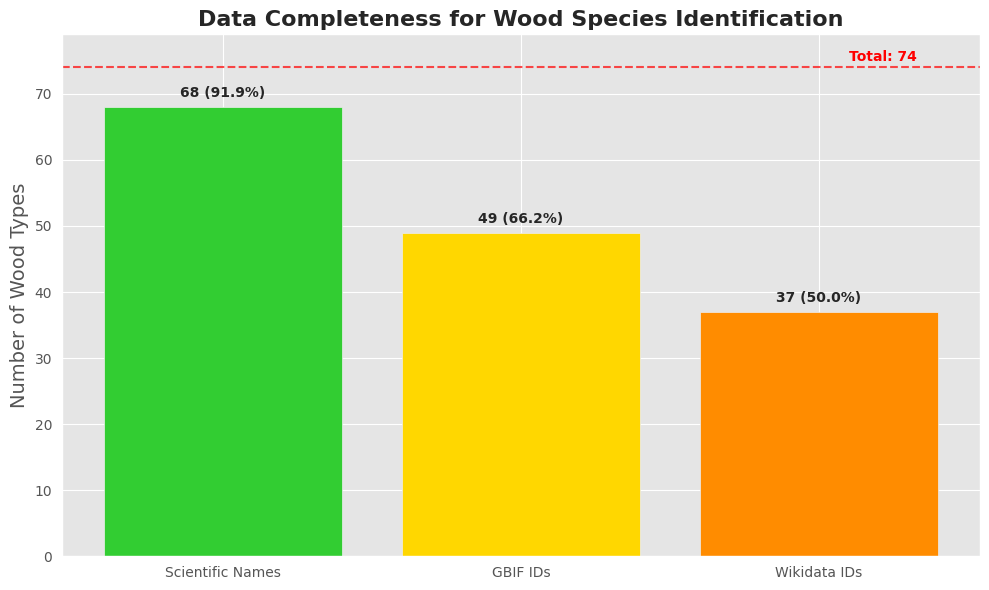


Wood types with complete information: 37 (50.0%)

Top 10 wood types by density with complete information:


,Common Name,Scientific Name,GBIF ID,Wood Density,Wikidata ID
54,Jacaré,Piptadenia communis,2951777,0.994,Q50851197
46,Guaritan,Engl,8890855,0.984,Q107273309
21,Cabruéuva,Myrocarpus fastigiatus,2945758,0.970,Q15535612
41,Faveiro,Pterodon pubescens,5342610,0.955,Q50858505
17,Bico de pato,Machaerium acutifolium,5354997,0.946,Q5988762
10,Araribá amarelho,Centrolobium robustum,2945570,0.940,Q15528519
53,Jacarandá do matto,Machaerium villosum,5354918,0.939,Q5458206
6,Angelim doce,Andira fraxinifolia,2952186,0.923,Q15523263
69,Saguaragy,Colubrina rufa,5602998,0.903,Q111077867
61,Mandaravé,Calliandra tweediei,2982058,0.895,Q2934134


In [22]:
# Save the final table to a TSV file
final_table.to_csv('wood_densities_with_ids.tsv', sep='\t', index=False)

# Create a summary of the results
print("Summary of Wood Density Data Enrichment:")
print(f"Total wood types: {len(final_table)}")
print(f"Wood types with scientific names: {final_table['Scientific Name'].notna().sum()} ({final_table['Scientific Name'].notna().sum()/len(final_table)*100:.1f}%)")
print(f"Wood types with GBIF IDs: {final_table['GBIF ID'].notna().sum()} ({final_table['GBIF ID'].notna().sum()/len(final_table)*100:.1f}%)")
print(f"Wood types with Wikidata IDs: {final_table['Wikidata ID'].notna().sum()} ({final_table['Wikidata ID'].notna().sum()/len(final_table)*100:.1f}%)")

# Create a visualization of the data completeness
plt.figure(figsize=(10, 6))
completeness = [
    final_table['Scientific Name'].notna().sum(),
    final_table['GBIF ID'].notna().sum(),
    final_table['Wikidata ID'].notna().sum()
]
labels = ['Scientific Names', 'GBIF IDs', 'Wikidata IDs']
colors = ['#32CD32', '#FFD700', '#FF8C00']

# Create the bar chart
bars = plt.bar(labels, completeness, color=colors)
plt.title('Data Completeness for Wood Species Identification', fontsize=16, fontweight='bold')
plt.ylabel('Number of Wood Types', fontsize=14)
plt.ylim(0, len(final_table) + 5)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height} ({height/len(final_table)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# Add a horizontal line for the total number of wood types
plt.axhline(y=len(final_table), color='red', linestyle='--', alpha=0.7)
plt.text(2.1, len(final_table) + 1, f'Total: {len(final_table)}', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Display the top 10 wood types by density with complete information
complete_info = final_table.dropna(subset=['Scientific Name', 'GBIF ID', 'Wikidata ID'])
print(f"\nWood types with complete information: {len(complete_info)} ({len(complete_info)/len(final_table)*100:.1f}%)")

print("\nTop 10 wood types by density with complete information:")
complete_info.sort_values(by='Wood Density', ascending=False).head(10)

In [24]:
# Modify the GBIF lookup to get accepted names for synonyms
from pygbif import species
import time

# Create a function to get the accepted name for a GBIF ID
def get_accepted_name(gbif_id):
    try:
        # Get species information from GBIF
        species_info = species.name_usage(key=gbif_id)
        
        # Check if this is a synonym and has an accepted key
        if species_info.get('status') == 'SYNONYM' and 'acceptedKey' in species_info:
            accepted_key = species_info.get('acceptedKey')
            
            # Get the accepted name information
            accepted_info = species.name_usage(key=accepted_key)
            
            return {
                'gbif_id': accepted_key,
                'scientific_name': accepted_info.get('scientificName'),
                'rank': accepted_info.get('rank'),
                'status': accepted_info.get('status')
            }
        
        # If it's already accepted or can't find accepted name, return the original
        return {
            'gbif_id': gbif_id,
            'scientific_name': species_info.get('scientificName'),
            'rank': species_info.get('rank'),
            'status': species_info.get('status')
        }
    except Exception as e:
        print(f"Error getting accepted name for GBIF ID {gbif_id}: {e}")
        return None

# Create a copy of the final dataframe
updated_df = final_table.copy()

# Add columns for the accepted information
updated_df['Accepted GBIF ID'] = updated_df['GBIF ID']
updated_df['Accepted Scientific Name'] = updated_df['Scientific Name']
updated_df['GBIF Status'] = None

# Process each row with a valid GBIF ID
valid_gbif_rows = updated_df['GBIF ID'].notna()
count = 0
total = valid_gbif_rows.sum()

print(f"Checking for accepted names for {total} GBIF IDs...")

for idx in updated_df[valid_gbif_rows].index:
    gbif_id = updated_df.loc[idx, 'GBIF ID']
    count += 1
    print(f"Processing {count}/{total}: GBIF ID {gbif_id}")
    
    # Get accepted name information
    accepted_info = get_accepted_name(int(gbif_id))
    
    if accepted_info:
        # Update the dataframe with accepted information
        updated_df.loc[idx, 'Accepted GBIF ID'] = accepted_info['gbif_id']
        updated_df.loc[idx, 'Accepted Scientific Name'] = accepted_info['scientific_name']
        updated_df.loc[idx, 'GBIF Status'] = accepted_info['status']
    
    # Add a small delay to avoid rate limiting
    time.sleep(0.5)

# Display the results
print("\nResults:")
print(f"Total wood types with GBIF IDs: {valid_gbif_rows.sum()}")
print(f"Number of synonyms found: {(updated_df['GBIF Status'] == 'SYNONYM').sum()}")
print(f"Number of accepted names: {(updated_df['GBIF Status'] == 'ACCEPTED').sum()}")

# Create the final updated table
final_updated_table = updated_df[['Common Name', 'Scientific Name', 'Accepted Scientific Name', 
                                 'GBIF ID', 'Accepted GBIF ID', 'GBIF Status', 'Wood Density', 'Wikidata ID']]

# Display examples of updated names (where Scientific Name != Accepted Scientific Name)
name_changes = final_updated_table[final_updated_table['Scientific Name'] != final_updated_table['Accepted Scientific Name']]
print(f"\nNumber of scientific names updated: {len(name_changes)}")
print("\nExamples of updated scientific names:")
if len(name_changes) > 0:
    print(name_changes[['Common Name', 'Scientific Name', 'Accepted Scientific Name', 'GBIF Status']].head(10))
else:
    print("No scientific names were updated.")

# Save the updated table to a TSV file
final_updated_table.to_csv('wood_densities_with_accepted_names.tsv', sep='\t', index=False)

# Display the final updated table
print("\nFinal Updated Table (first 10 rows):")
final_updated_table.head(10)

Checking for accepted names for 49 GBIF IDs...
Processing 1/49: GBIF ID 5706141
Processing 2/49: GBIF ID 8649092
Processing 3/49: GBIF ID 2952186
Processing 4/49: GBIF ID 7668216
Processing 5/49: GBIF ID 2945570
Processing 6/49: GBIF ID 8743701
Processing 7/49: GBIF ID 5685945
Processing 8/49: GBIF ID 2951722
Processing 9/49: GBIF ID 5354997
Processing 10/49: GBIF ID 11034599
Processing 11/49: GBIF ID 3073280
Processing 12/49: GBIF ID 2945499
Processing 13/49: GBIF ID 2945758
Processing 14/49: GBIF ID 3869541
Processing 15/49: GBIF ID 4094621
Processing 16/49: GBIF ID 3784833
Processing 17/49: GBIF ID 7638465
Processing 18/49: GBIF ID 5686071
Processing 19/49: GBIF ID 7319986
Processing 20/49: GBIF ID 7304098
Processing 21/49: GBIF ID 3852497
Processing 22/49: GBIF ID 2968672
Processing 23/49: GBIF ID 7107974
Processing 24/49: GBIF ID 3989410
Processing 25/49: GBIF ID 5342610
Processing 26/49: GBIF ID 2945459
Processing 27/49: GBIF ID 8890855
Processing 28/49: GBIF ID 4073481
Processin

,Common Name,Scientific Name,Accepted Scientific Name,GBIF ID,Accepted GBIF ID,GBIF Status,Wood Density,Wikidata ID
0,Açoita-cavallo,Luehea divaricata,Luehea divaricata Mart.,5706141,5706141,None,0.586,Q6699568
1,Aderno,Myracroduor concinnum,Myracroduor concinnum,None,None,None,0.934,None
2,Alecrim,None,None,None,None,None,0.943,None
3,Alleluia,Cassia bacillaris,Cassia bacillaris Willd.,8649092,8649092,None,0.567,None
4,Andá-assú,None,None,None,None,None,0.494,None
5,Angelim,None,None,None,None,None,0.723,None
6,Angelim doce,Andira fraxinifolia,Andira fraxinifolia Benth.,2952186,2952186,None,0.923,Q15523263
7,Anil-assú,Eupatorium laeve,"Eupatorium laeve Griseb., 1874",7668216,7668216,None,0.512,None
8,Arapoca amarella,None,None,None,None,None,1.115,None
9,Arapoca branca,None,None,None,None,None,0.764,None


In [25]:
# Debug the issue with getting accepted names
from pygbif import species
import time
import pandas as pd

# Let's check a specific example: Piptadenia communis (GBIF ID 2951777)
print("Checking Piptadenia communis (GBIF ID 2951777):")
species_info = species.name_usage(key=2951777)

# Print the full response to see what fields are available
print("\nFull response from GBIF API:")
for key, value in species_info.items():
    print(f"{key}: {value}")

# Check if this is a synonym
is_synonym = species_info.get('taxonomicStatus') == 'SYNONYM'
print(f"\nIs this a synonym according to 'taxonomicStatus'? {is_synonym}")

# If it's a synonym, get the accepted name
if is_synonym and 'acceptedKey' in species_info:
    accepted_key = species_info.get('acceptedKey')
    print(f"Accepted key: {accepted_key}")
    
    # Get the accepted name information
    accepted_info = species.name_usage(key=accepted_key)
    print(f"Accepted name: {accepted_info.get('scientificName')}")
else:
    print("Not identified as a synonym or no accepted key found")

# Now let's fix our function to correctly handle synonyms
def get_accepted_name_fixed(gbif_id):
    try:
        # Get species information from GBIF
        species_info = species.name_usage(key=gbif_id)
        
        # Check if this is a synonym using taxonomicStatus
        if species_info.get('taxonomicStatus') == 'SYNONYM' and 'acceptedKey' in species_info:
            accepted_key = species_info.get('acceptedKey')
            
            # Get the accepted name information
            accepted_info = species.name_usage(key=accepted_key)
            
            return {
                'gbif_id': accepted_key,
                'scientific_name': accepted_info.get('scientificName'),
                'rank': accepted_info.get('rank'),
                'status': 'SYNONYM',  # Mark as synonym
                'accepted_name': accepted_info.get('scientificName')
            }
        
        # If it's already accepted or can't find accepted name, return the original
        return {
            'gbif_id': gbif_id,
            'scientific_name': species_info.get('scientificName'),
            'rank': species_info.get('rank'),
            'status': species_info.get('taxonomicStatus'),
            'accepted_name': species_info.get('scientificName')  # Same as scientific_name
        }
    except Exception as e:
        print(f"Error getting accepted name for GBIF ID {gbif_id}: {e}")
        return None

# Test the fixed function with Piptadenia communis
print("\nTesting fixed function with Piptadenia communis:")
result = get_accepted_name_fixed(2951777)
if result:
    print(f"Original name: {result['scientific_name']}")
    print(f"Status: {result['status']}")
    print(f"Accepted name: {result['accepted_name']}")
    print(f"Accepted GBIF ID: {result['gbif_id']}")
else:
    print("Failed to get information")

Checking Piptadenia communis (GBIF ID 2951777):

Full response from GBIF API:
key: 2951777
nubKey: 2951777
nameKey: 8787074
taxonID: gbif:2951777
kingdom: Plantae
phylum: Tracheophyta
order: Fabales
family: Fabaceae
genus: Piptadenia
species: Piptadenia gonoacantha
kingdomKey: 6
phylumKey: 7707728
classKey: 220
orderKey: 1370
familyKey: 5386
genusKey: 2951753
speciesKey: 2951773
datasetKey: d7dddbf4-2cf0-4f39-9b2a-bb099caae36c
constituentKey: 7ddf754f-d193-4cc9-b351-99906754a03b
parentKey: 2951753
parent: Piptadenia
acceptedKey: 2951773
accepted: Piptadenia gonoacantha (Mart.) J.F.Macbr.
scientificName: Piptadenia communis Benth.
canonicalName: Piptadenia communis
authorship: Benth.
nameType: SCIENTIFIC
rank: SPECIES
origin: SOURCE
taxonomicStatus: SYNONYM
nomenclaturalStatus: []
remarks: 
publishedIn: J. Bot. (Hooker)4: 337 (1841)
numDescendants: 0
lastCrawled: 2023-08-22T23:20:59.545+00:00
lastInterpreted: 2023-08-22T23:09:03.869+00:00
issues: []
class: Magnoliopsida

Is this a synon

In [26]:
# Update the GBIF lookup to correctly get accepted names for synonyms
from pygbif import species
import time

# Create a function to get the accepted name for a GBIF ID using the fixed approach
def get_accepted_name_fixed(gbif_id):
    try:
        # Get species information from GBIF
        species_info = species.name_usage(key=gbif_id)
        
        # Check if this is a synonym using taxonomicStatus
        if species_info.get('taxonomicStatus') == 'SYNONYM' and 'acceptedKey' in species_info:
            accepted_key = species_info.get('acceptedKey')
            
            # Get the accepted name information
            accepted_info = species.name_usage(key=accepted_key)
            
            return {
                'gbif_id': accepted_key,
                'scientific_name': accepted_info.get('scientificName'),
                'rank': accepted_info.get('rank'),
                'status': 'SYNONYM',  # Mark as synonym
                'accepted_name': accepted_info.get('scientificName')
            }
        
        # If it's already accepted or can't find accepted name, return the original
        return {
            'gbif_id': gbif_id,
            'scientific_name': species_info.get('scientificName'),
            'rank': species_info.get('rank'),
            'status': species_info.get('taxonomicStatus'),
            'accepted_name': species_info.get('scientificName')  # Same as scientific_name
        }
    except Exception as e:
        print(f"Error getting accepted name for GBIF ID {gbif_id}: {e}")
        return None

# Create a copy of the final dataframe
updated_df = final_table.copy()

# Add columns for the accepted information
updated_df['Accepted GBIF ID'] = updated_df['GBIF ID']
updated_df['Accepted Scientific Name'] = updated_df['Scientific Name']
updated_df['GBIF Status'] = None

# Process each row with a valid GBIF ID
valid_gbif_rows = updated_df['GBIF ID'].notna()
count = 0
total = valid_gbif_rows.sum()

print(f"Checking for accepted names for {total} GBIF IDs...")

for idx in updated_df[valid_gbif_rows].index:
    gbif_id = updated_df.loc[idx, 'GBIF ID']
    count += 1
    print(f"Processing {count}/{total}: GBIF ID {gbif_id}")
    
    # Get accepted name information using the fixed function
    accepted_info = get_accepted_name_fixed(int(gbif_id))
    
    if accepted_info:
        # Update the dataframe with accepted information
        updated_df.loc[idx, 'Accepted GBIF ID'] = accepted_info['gbif_id']
        updated_df.loc[idx, 'Accepted Scientific Name'] = accepted_info['scientific_name']
        updated_df.loc[idx, 'GBIF Status'] = accepted_info['status']
    
    # Add a small delay to avoid rate limiting
    time.sleep(0.5)

# Display the results
print("\nResults:")
print(f"Total wood types with GBIF IDs: {valid_gbif_rows.sum()}")
print(f"Number of synonyms found: {(updated_df['GBIF Status'] == 'SYNONYM').sum()}")
print(f"Number of accepted names: {(updated_df['GBIF Status'] == 'ACCEPTED').sum()}")

# Create the final updated table
final_updated_table = updated_df[['Common Name', 'Scientific Name', 'Accepted Scientific Name', 
                                 'GBIF ID', 'Accepted GBIF ID', 'GBIF Status', 'Wood Density', 'Wikidata ID']]

# Display examples of updated names (where Scientific Name != Accepted Scientific Name)
name_changes = final_updated_table[final_updated_table['Scientific Name'] != final_updated_table['Accepted Scientific Name']]
print(f"\nNumber of scientific names updated: {len(name_changes)}")
print("\nExamples of updated scientific names:")
if len(name_changes) > 0:
    print(name_changes[['Common Name', 'Scientific Name', 'Accepted Scientific Name', 'GBIF Status']].head(10))
else:
    print("No scientific names were updated.")

# Save the updated table to a TSV file
final_updated_table.to_csv('wood_densities_with_accepted_names.tsv', sep='\t', index=False)

# Display the final updated table
print("\nFinal Updated Table (first 10 rows):")
final_updated_table.head(10)

Checking for accepted names for 49 GBIF IDs...
Processing 1/49: GBIF ID 5706141
Processing 2/49: GBIF ID 8649092
Processing 3/49: GBIF ID 2952186
Processing 4/49: GBIF ID 7668216
Processing 5/49: GBIF ID 2945570
Processing 6/49: GBIF ID 8743701
Processing 7/49: GBIF ID 5685945
Processing 8/49: GBIF ID 2951722
Processing 9/49: GBIF ID 5354997
Processing 10/49: GBIF ID 11034599
Processing 11/49: GBIF ID 3073280
Processing 12/49: GBIF ID 2945499
Processing 13/49: GBIF ID 2945758
Processing 14/49: GBIF ID 3869541
Processing 15/49: GBIF ID 4094621
Processing 16/49: GBIF ID 3784833
Processing 17/49: GBIF ID 7638465
Processing 18/49: GBIF ID 5686071
Processing 19/49: GBIF ID 7319986
Processing 20/49: GBIF ID 7304098
Processing 21/49: GBIF ID 3852497
Processing 22/49: GBIF ID 2968672
Processing 23/49: GBIF ID 7107974
Processing 24/49: GBIF ID 3989410
Processing 25/49: GBIF ID 5342610
Processing 26/49: GBIF ID 2945459
Processing 27/49: GBIF ID 8890855
Processing 28/49: GBIF ID 4073481
Processin

,Common Name,Scientific Name,Accepted Scientific Name,GBIF ID,Accepted GBIF ID,GBIF Status,Wood Density,Wikidata ID
0,Açoita-cavallo,Luehea divaricata,Luehea divaricata Mart.,5706141,5706141,ACCEPTED,0.586,Q6699568
1,Aderno,Myracroduor concinnum,Myracroduor concinnum,None,None,None,0.934,None
2,Alecrim,None,None,None,None,None,0.943,None
3,Alleluia,Cassia bacillaris,Cassia bacillaris Willd.,8649092,8649092,HOMOTYPIC_SYNONYM,0.567,None
4,Andá-assú,None,None,None,None,None,0.494,None
5,Angelim,None,None,None,None,None,0.723,None
6,Angelim doce,Andira fraxinifolia,Andira fraxinifolia Benth.,2952186,2952186,ACCEPTED,0.923,Q15523263
7,Anil-assú,Eupatorium laeve,Ophryosporus lorentzii Hieron.,7668216,3140073,SYNONYM,0.512,None
8,Arapoca amarella,None,None,None,None,None,1.115,None
9,Arapoca branca,None,None,None,None,None,0.764,None


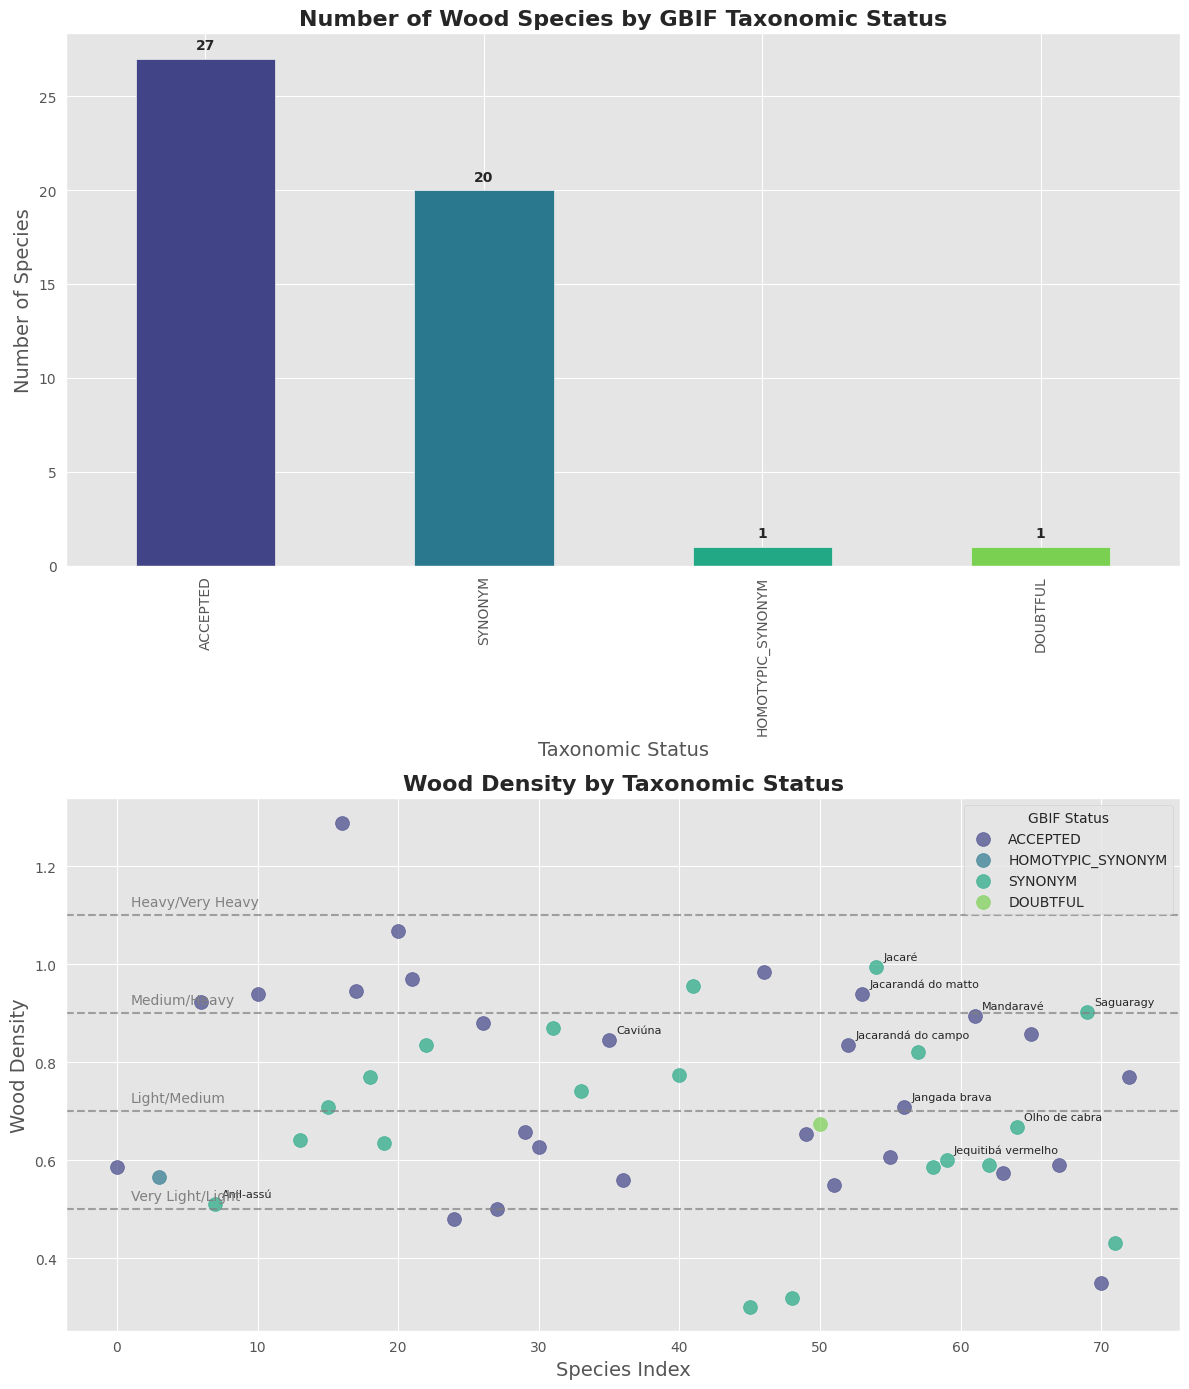

Summary of Wood Density Data with Accepted Names:
Total wood types: 74
Wood types with scientific names: 68 (91.9%)
Wood types with GBIF IDs: 49 (66.2%)
Wood types with accepted scientific names: 68 (91.9%)
Wood types with Wikidata IDs: 37 (50.0%)
Number of synonyms found: 20
Number of homotypic synonyms: 1
Number of accepted names: 27

Examples of synonyms updated to accepted names:
      Common Name       Scientific Name  \
3        Alleluia     Cassia bacillaris   
7       Anil-assú      Eupatorium laeve   
13        Ataiúba    Guarea tuberculata   
15        Batalha     Nectandra robusta   
18       Bicuhyba    Myristica bicuhyba   
19     Branquilho  Gymnanthes marginata   
22      Cafezinho  Mouriria chamissoana   
31  Canella preta      Nectandra mollis   
33      Cangerana    Cabralea cangerana   
40      Dedaleiro          Lafoensia sp   

                          Accepted Scientific Name        GBIF Status  
3                         Cassia bacillaris Willd.  HOMOTYPIC_SYNON

In [27]:
# Create a visualization of the updated data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
plt.style.use('ggplot')
sns.set_palette("viridis")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# 1. Bar chart showing the number of species by taxonomic status
status_counts = final_updated_table['GBIF Status'].value_counts().sort_values(ascending=False)
status_counts.plot(kind='bar', ax=axes[0], color=sns.color_palette("viridis", len(status_counts)))
axes[0].set_title('Number of Wood Species by GBIF Taxonomic Status', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Taxonomic Status', fontsize=14)
axes[0].set_ylabel('Number of Species', fontsize=14)

# Add count labels on top of bars
for i, count in enumerate(status_counts):
    axes[0].text(i, count + 0.5, str(count), ha='center', fontweight='bold')

# 2. Scatter plot of wood density by taxonomic status
# Filter to only include rows with GBIF status
filtered_df = final_updated_table[final_updated_table['GBIF Status'].notna()]

# Create a categorical color map based on GBIF Status
status_categories = filtered_df['GBIF Status'].unique()
colors = sns.color_palette("viridis", len(status_categories))
status_color_map = dict(zip(status_categories, colors))

# Create the scatter plot
for status in status_categories:
    subset = filtered_df[filtered_df['GBIF Status'] == status]
    axes[1].scatter(subset.index, subset['Wood Density'], 
                   label=status, 
                   color=status_color_map[status],
                   alpha=0.7, s=100)

# Add species names as annotations for a few points
for i, row in filtered_df.sample(min(10, len(filtered_df))).iterrows():
    axes[1].annotate(row['Common Name'], 
                    (i, row['Wood Density']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8)

axes[1].set_title('Wood Density by Taxonomic Status', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Species Index', fontsize=14)
axes[1].set_ylabel('Wood Density', fontsize=14)
axes[1].legend(title='GBIF Status')

# Add horizontal lines for density categories
density_categories = [
    (0.5, 'Very Light/Light', 'gray'),
    (0.7, 'Light/Medium', 'gray'),
    (0.9, 'Medium/Heavy', 'gray'),
    (1.1, 'Heavy/Very Heavy', 'gray')
]

for value, label, color in density_categories:
    axes[1].axhline(y=value, color=color, linestyle='--', alpha=0.7)
    axes[1].text(len(filtered_df) * 0.02, value + 0.02, label, fontsize=10, color=color)

plt.tight_layout()
plt.show()

# Create a summary of the updated results
print("Summary of Wood Density Data with Accepted Names:")
print(f"Total wood types: {len(final_updated_table)}")
print(f"Wood types with scientific names: {final_updated_table['Scientific Name'].notna().sum()} ({final_updated_table['Scientific Name'].notna().sum()/len(final_updated_table)*100:.1f}%)")
print(f"Wood types with GBIF IDs: {final_updated_table['GBIF ID'].notna().sum()} ({final_updated_table['GBIF ID'].notna().sum()/len(final_updated_table)*100:.1f}%)")
print(f"Wood types with accepted scientific names: {final_updated_table['Accepted Scientific Name'].notna().sum()} ({final_updated_table['Accepted Scientific Name'].notna().sum()/len(final_updated_table)*100:.1f}%)")
print(f"Wood types with Wikidata IDs: {final_updated_table['Wikidata ID'].notna().sum()} ({final_updated_table['Wikidata ID'].notna().sum()/len(final_updated_table)*100:.1f}%)")
print(f"Number of synonyms found: {(final_updated_table['GBIF Status'] == 'SYNONYM').sum()}")
print(f"Number of homotypic synonyms: {(final_updated_table['GBIF Status'] == 'HOMOTYPIC_SYNONYM').sum()}")
print(f"Number of accepted names: {(final_updated_table['GBIF Status'] == 'ACCEPTED').sum()}")

# Display examples of synonyms that were updated to accepted names
synonyms = final_updated_table[(final_updated_table['GBIF Status'] == 'SYNONYM') | 
                              (final_updated_table['GBIF Status'] == 'HOMOTYPIC_SYNONYM')]
print("\nExamples of synonyms updated to accepted names:")
if len(synonyms) > 0:
    print(synonyms[['Common Name', 'Scientific Name', 'Accepted Scientific Name', 'GBIF Status']].head(10))
else:
    print("No synonyms found.")

# Display the wood types with the highest and lowest densities
print("\nTop 5 wood types by density:")
print(final_updated_table.sort_values(by='Wood Density', ascending=False)[['Common Name', 'Accepted Scientific Name', 'Wood Density']].head(5))

print("\nBottom 5 wood types by density:")
print(final_updated_table.sort_values(by='Wood Density')[['Common Name', 'Accepted Scientific Name', 'Wood Density']].head(5))

In [28]:
# Generate QuickStatements for Wikidata
# For items with Wikidata IDs, add:
# 1. Common names in Portuguese
# 2. Wood density values
# All stated in Q51406082

# Filter to only include rows with valid Wikidata IDs
wikidata_rows = final_updated_table[final_updated_table['Wikidata ID'].notna()]

print(f"Generating QuickStatements for {len(wikidata_rows)} wood species with Wikidata IDs...")

# Create QuickStatements
quickstatements = []

# Property IDs
COMMON_NAME_PROPERTY = "P1843"  # "taxon common name"
DENSITY_PROPERTY = "P2054"      # "density"
STATED_IN_PROPERTY = "P248"     # "stated in"
REFERENCE_ID = "Q51406082"      # Reference ID provided by user

# For each row, create QuickStatements
for _, row in wikidata_rows.iterrows():
    wikidata_id = row['Wikidata ID']
    common_name = row['Common Name']
    density = row['Wood Density']
    
    # 1. Add common name in Portuguese
    # Format: QID|P1843|"common name"@pt|S248|Q51406082
    quickstatements.append(f"{wikidata_id}|{COMMON_NAME_PROPERTY}|\"{common_name}\"@pt|S{STATED_IN_PROPERTY}|{REFERENCE_ID}")
    
    # 2. Add wood density
    # Format: QID|P2054|density|unit/kilogram per cubic metre|S248|Q51406082
    # Note: Assuming the density is in g/cm³, which is equivalent to 1000 kg/m³
    density_kg_m3 = density * 1000
    quickstatements.append(f"{wikidata_id}|{DENSITY_PROPERTY}|{density_kg_m3}|U/kilogram per cubic metre|S{STATED_IN_PROPERTY}|{REFERENCE_ID}")

# Save QuickStatements to a file
with open('wood_density_quickstatements.txt', 'w') as f:
    f.write('\n'.join(quickstatements))

print(f"Generated {len(quickstatements)} QuickStatements.")
print("First 10 QuickStatements:")
for i, statement in enumerate(quickstatements[:10]):
    print(f"{i+1}. {statement}")

print("\nQuickStatements saved to 'wood_density_quickstatements.txt'")

Generating QuickStatements for 37 wood species with Wikidata IDs...
Generated 74 QuickStatements.
First 10 QuickStatements:
1. Q6699568|P1843|"Açoita-cavallo"@pt|SP248|Q51406082
2. Q6699568|P2054|586.0|U/kilogram per cubic metre|SP248|Q51406082
3. Q15523263|P1843|"Angelim doce"@pt|SP248|Q51406082
4. Q15523263|P2054|923.0|U/kilogram per cubic metre|SP248|Q51406082
5. Q15528519|P1843|"Araribá amarelho"@pt|SP248|Q51406082
6. Q15528519|P2054|940.0|U/kilogram per cubic metre|SP248|Q51406082
7. Q5988762|P1843|"Bico de pato"@pt|SP248|Q51406082
8. Q5988762|P2054|946.0|U/kilogram per cubic metre|SP248|Q51406082
9. Q15535612|P1843|"Cabruéuva"@pt|SP248|Q51406082
10. Q15535612|P2054|970.0|U/kilogram per cubic metre|SP248|Q51406082

QuickStatements saved to 'wood_density_quickstatements.txt'


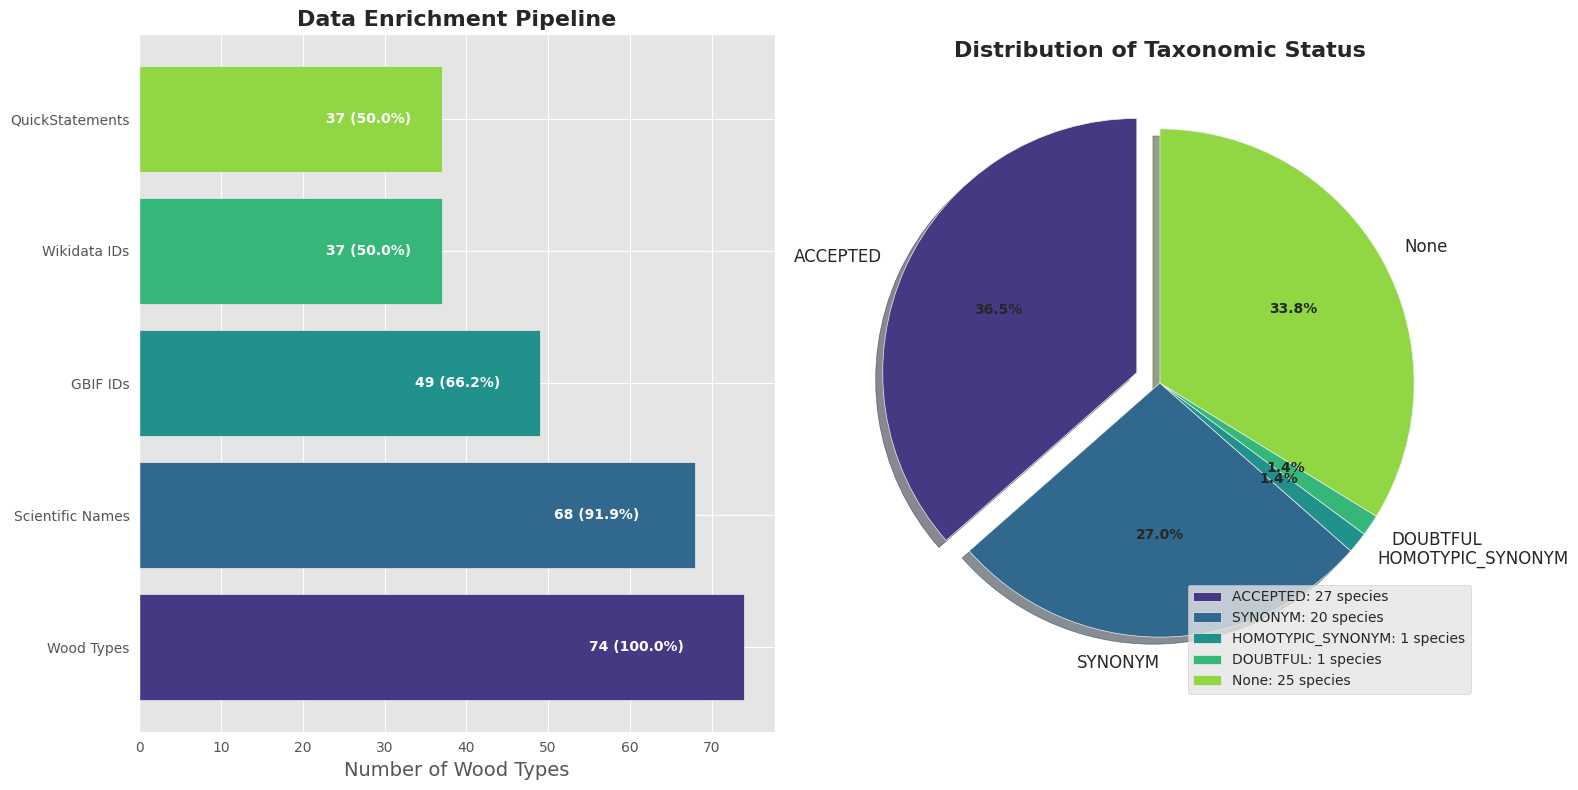

Final Summary of Wood Density Data Enrichment:
Total wood types: 74
Wood types with scientific names: 68 (91.9%)
Wood types with GBIF IDs: 49 (66.2%)
Wood types with Wikidata IDs: 37 (50.0%)
QuickStatements generated: 74 (for 37 species)

Taxonomic Status Distribution:
- ACCEPTED: 27 species (36.5%)
- SYNONYM: 20 species (27.0%)
- HOMOTYPIC_SYNONYM: 1 species (1.4%)
- DOUBTFUL: 1 species (1.4%)
- None: 25 species (33.8%)

Density Distribution:
- Very Light (0-0.5 g/cm³): 7 species (9.5%)
- Light (0.5-0.7 g/cm³): 21 species (28.4%)
- Medium (0.7-0.9 g/cm³): 23 species (31.1%)
- Heavy (0.9-1.1 g/cm³): 19 species (25.7%)
- Very Heavy (1.1-inf g/cm³): 4 species (5.4%)

All data processing complete. Files generated:
1. wood_densities_with_ids.tsv - Wood types with GBIF and Wikidata IDs
2. wood_densities_with_accepted_names.tsv - Wood types with accepted scientific names
3. wood_density_quickstatements.txt - QuickStatements for Wikidata
4. wood_densities_images.jpeg - Visualization of the da

In [29]:
# Create a final visualization to summarize the entire process
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Set the style
plt.style.use('ggplot')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 1. Sankey diagram-like visualization of the data flow
# Define the stages and counts
stages = ['Wood Types', 'Scientific Names', 'GBIF IDs', 'Wikidata IDs', 'QuickStatements']
counts = [
    len(final_updated_table),
    final_updated_table['Scientific Name'].notna().sum(),
    final_updated_table['GBIF ID'].notna().sum(),
    final_updated_table['Wikidata ID'].notna().sum(),
    len(quickstatements) // 2  # Divide by 2 because we have 2 statements per species
]

# Create a horizontal bar chart
bars = axes[0].barh(stages, counts, color=sns.color_palette("viridis", len(stages)))
axes[0].set_title('Data Enrichment Pipeline', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Number of Wood Types', fontsize=14)

# Add count labels inside bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0].text(width - width*0.1, bar.get_y() + bar.get_height()/2, 
                f'{counts[i]} ({counts[i]/counts[0]*100:.1f}%)', 
                ha='right', va='center', color='white', fontweight='bold')

# 2. Pie chart of taxonomic status distribution
status_counts = final_updated_table['GBIF Status'].value_counts()
status_counts['None'] = final_updated_table['GBIF Status'].isna().sum()

# Create a custom colormap for the pie chart
colors = sns.color_palette("viridis", len(status_counts))
explode = [0.1 if status == 'ACCEPTED' else 0 for status in status_counts.index]

# Create the pie chart
wedges, texts, autotexts = axes[1].pie(
    status_counts, 
    labels=status_counts.index, 
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    shadow=True,
    startangle=90
)

# Customize the pie chart text
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

axes[1].set_title('Distribution of Taxonomic Status', fontsize=16, fontweight='bold')

# Add a legend with counts
legend_elements = [
    Patch(facecolor=colors[i], label=f'{status}: {count} species')
    for i, (status, count) in enumerate(status_counts.items())
]
axes[1].legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('wood_densities_images.jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Final summary
print("Final Summary of Wood Density Data Enrichment:")
print(f"Total wood types: {len(final_updated_table)}")
print(f"Wood types with scientific names: {final_updated_table['Scientific Name'].notna().sum()} ({final_updated_table['Scientific Name'].notna().sum()/len(final_updated_table)*100:.1f}%)")
print(f"Wood types with GBIF IDs: {final_updated_table['GBIF ID'].notna().sum()} ({final_updated_table['GBIF ID'].notna().sum()/len(final_updated_table)*100:.1f}%)")
print(f"Wood types with Wikidata IDs: {final_updated_table['Wikidata ID'].notna().sum()} ({final_updated_table['Wikidata ID'].notna().sum()/len(final_updated_table)*100:.1f}%)")
print(f"QuickStatements generated: {len(quickstatements)} (for {len(quickstatements)//2} species)")
print("\nTaxonomic Status Distribution:")
for status, count in status_counts.items():
    print(f"- {status}: {count} species ({count/len(final_updated_table)*100:.1f}%)")

print("\nDensity Distribution:")
density_ranges = [
    (0, 0.5, 'Very Light'),
    (0.5, 0.7, 'Light'),
    (0.7, 0.9, 'Medium'),
    (0.9, 1.1, 'Heavy'),
    (1.1, float('inf'), 'Very Heavy')
]

for min_val, max_val, label in density_ranges:
    count = ((final_updated_table['Wood Density'] >= min_val) & 
             (final_updated_table['Wood Density'] < max_val)).sum()
    print(f"- {label} ({min_val}-{max_val} g/cm³): {count} species ({count/len(final_updated_table)*100:.1f}%)")

print("\nAll data processing complete. Files generated:")
print("1. wood_densities_with_ids.tsv - Wood types with GBIF and Wikidata IDs")
print("2. wood_densities_with_accepted_names.tsv - Wood types with accepted scientific names")
print("3. wood_density_quickstatements.txt - QuickStatements for Wikidata")
print("4. wood_densities_images.jpeg - Visualization of the data enrichment process")

In [33]:
# Generate corrected QuickStatements for Wikidata
# For items with Wikidata IDs, add:
# 1. Common names in Portuguese
# 2. Wood density values
# All stated in Q51406082

# Filter to only include rows with valid Wikidata IDs
wikidata_rows = final_updated_table[final_updated_table['Wikidata ID'].notna()]

print(f"Generating corrected QuickStatements for {len(wikidata_rows)} wood species with Wikidata IDs...")

# Create QuickStatements
quickstatements = []

# Property IDs
COMMON_NAME_PROPERTY = "P1843"  # "taxon common name"
DENSITY_PROPERTY = "P2054"      # "density"
STATED_IN = "248"               # "stated in" (without P prefix)
APPLIES_TO_PROPERTY = "P518"    # "applies to"
WOOD_ITEM = "Q287"              # Wikidata item for "wood"
REFERENCE_ID = "Q51406082"      # Reference ID provided by user
GRAM_PER_CUBIC_CENTIMETER = "U13147228"  # Unit ID for kg/m³

# For each row, create QuickStatements
for _, row in wikidata_rows.iterrows():
    wikidata_id = row['Wikidata ID']
    common_name = row['Common Name']
    density = row['Wood Density']
    
    # 1. Add common name in Portuguese
    # Format: QID|P1843|pt:"common name"|S248|Q51406082
    quickstatements.append(f"{wikidata_id}|{COMMON_NAME_PROPERTY}|pt:\"{common_name}\"|S{STATED_IN}|{REFERENCE_ID}")
    
    # 2. Add wood density
    # Format: QID|P2054|density_valueUunit_id|P518|Q287|S248|Q51406082
    quickstatements.append(f"{wikidata_id}|{DENSITY_PROPERTY}|{density}{GRAM_PER_CUBIC_CENTIMETER}|{APPLIES_TO_PROPERTY}|{WOOD_ITEM}|S{STATED_IN}|{REFERENCE_ID}")

# Save QuickStatements to a file
with open('wood_density_quickstatements.txt', 'w') as f:
    f.write('\n'.join(quickstatements))

print(f"Generated {len(quickstatements)} corrected QuickStatements.")
print("First 10 QuickStatements:")
for i, statement in enumerate(quickstatements[:10]):
    print(f"{i+1}. {statement}")

print("\nCorrected QuickStatements saved to 'wood_density_quickstatements.txt'")

Generating corrected QuickStatements for 37 wood species with Wikidata IDs...
Generated 74 corrected QuickStatements.
First 10 QuickStatements:
1. Q6699568|P1843|pt:"Açoita-cavallo"|S248|Q51406082
2. Q6699568|P2054|0.586U13147228|P518|Q287|S248|Q51406082
3. Q15523263|P1843|pt:"Angelim doce"|S248|Q51406082
4. Q15523263|P2054|0.923U13147228|P518|Q287|S248|Q51406082
5. Q15528519|P1843|pt:"Araribá amarelho"|S248|Q51406082
6. Q15528519|P2054|0.94U13147228|P518|Q287|S248|Q51406082
7. Q5988762|P1843|pt:"Bico de pato"|S248|Q51406082
8. Q5988762|P2054|0.946U13147228|P518|Q287|S248|Q51406082
9. Q15535612|P1843|pt:"Cabruéuva"|S248|Q51406082
10. Q15535612|P2054|0.97U13147228|P518|Q287|S248|Q51406082

Corrected QuickStatements saved to 'wood_density_quickstatements.txt'
